In [21]:
import pandas as pd
import numpy as np
cyclo = pd.read_csv("cyclopentanone_pbe0_6311pgs_n512_gauss0.05.nm.tsv", sep="\t")
pina = pd.read_csv("pinacolone_pbe0_6311pgs_n256_gauss0.05.nm.tsv",  sep="\t")
AF = pd.read_csv("StandardActinicFlux.csv")

cyclo = cyclo.drop("gaussian broadening, width = 0.05 eV", axis=1)
pina = pina.drop("gaussian broadening, width = 0.05 eV", axis=1)

WLcy = cyclo["# Energy / nm"].to_numpy() #data to use in interpolation
Icy = cyclo["Intensity / cm^2 per molecule"].to_numpy()

WLpin = pina["# Energy / nm"].to_numpy() #data to use in interpolation
Ipin = pina["Intensity / cm^2 per molecule"].to_numpy()

WLAF = AF["wc"].to_numpy()
FAF = AF["H0_200"].to_numpy()

In [23]:
def FindJ(afWL, af, gWL, gI, quant_yield):
    mask = (gWL > afWL.min()) & (gWL < afWL.max())
    fitted_gWL = gWL[mask]
    fitted_gI = gI[mask]
    
    g_af = np.interp(fitted_gWL, afWL, af)
    
    J = g_af * fitted_gI * quant_yield
    
    return g_af ,J, fitted_gWL

af_cy, Jcy, WLcy_fit  = FindJ(WLAF, FAF, WLcy, Icy, 0.5)
af_pin, Jpin, WLpin_fit = FindJ(WLAF, FAF, WLpin, Ipin, 0.5)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'J')

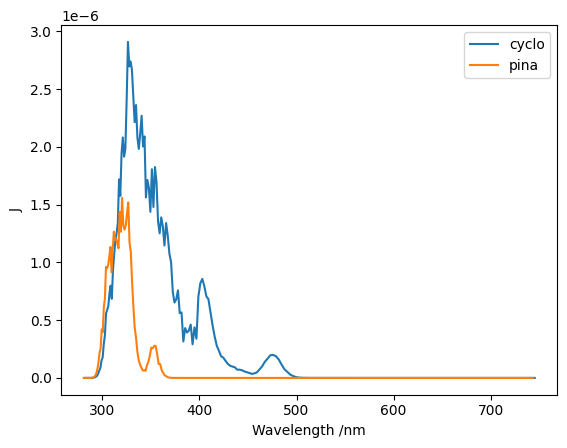

In [24]:
sns.lineplot(x = WLcy_fit , y=Jcy, label = "cyclo")
plt.xlabel("Wavelength /nm")
plt.ylabel("J")

sns.lineplot(x = WLpin_fit , y=Jpin, label = "pina")
plt.xlabel("Wavelength /nm")
plt.ylabel("J")